# The data used for this project's exploratory data analysis has been sourced from:

1) National Highway Traffic Safety Administration API (US data) (https://crashviewer.nhtsa.dot.gov/CrashAPI), all NHTSA files are also available to download in CSV form at (https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/2021/National/). 

## Data cleansing of the National Highway Traffic Safety Administration API (US data):

In [1]:
# importing dependencies
import pandas as pd
import numpy as np
import scipy as st
from scipy.stats import linregress 
import scipy.stats as st
import matplotlib.pyplot as plt
import requests
import json
import csv 

In [2]:
# Import CSV containing road accident data from the year 2020. 
csv_path = "source_data/Accidents_2020_2020.csv"
Accidents_2020 = pd.read_csv(csv_path)
Accidents_2020.head()

,caseyear,state,st_case,statename,ve_total,ve_forms,pvh_invl,peds,pernotmvit,permvit,...,cf2name,cf3,cf3name,fatals,drunk_dr,age,speed_limit,race,vehicle_make,sex
0,2020,1,10001,Alabama,1,1,0,0,0,4,...,NaN,NaN,NaN,3,1,24.0,45.0,Black or African American,Lexus,Female
1,2020,1,10002,Alabama,4,4,0,0,0,6,...,NaN,NaN,NaN,1,0,40.0,35.0,Not a Fatality (not Applicable),Chevrolet,Female
2,2020,1,10003,Alabama,2,2,0,0,0,2,...,NaN,NaN,NaN,1,0,34.0,65.0,White,Toyota,Male
3,2020,1,10004,Alabama,1,1,0,0,0,5,...,NaN,NaN,NaN,1,0,17.0,35.0,Not a Fatality (not Applicable),Hyundai,Male
4,2020,1,10005,Alabama,1,1,0,0,0,1,...,NaN,NaN,NaN,1,0,47.0,45.0,White,GMC,Male


In [3]:
# The output DataFrame has lots of redundant columns, the below create a new DataFrames with the columns of focus in this exploration stage. 
Cleaned_df = Accidents_2020[["caseyear", "st_case","statename","persons", "countyname", "monthname", 
                                  "day_week", "hour", "rur_urbname", "routename", "latitude", "longitud", 
                                  "harm_evname","lgt_condname", "weathername", "fatals", "drunk_dr", "age", "speed_limit", "race", "vehicle_make", "sex"]]
Cleaned_df.head()

,caseyear,st_case,statename,persons,countyname,monthname,day_week,hour,rur_urbname,routename,...,harm_evname,lgt_condname,weathername,fatals,drunk_dr,age,speed_limit,race,vehicle_make,sex
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24.0,45.0,Black or African American,Lexus,Female
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40.0,35.0,Not a Fatality (not Applicable),Chevrolet,Female
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,Ditch,Daylight,Rain,1,0,34.0,65.0,White,Toyota,Male
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,Tree (Standing Only),Daylight,Cloudy,1,0,17.0,35.0,Not a Fatality (not Applicable),Hyundai,Male
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47.0,45.0,White,GMC,Male


In [4]:
# Dropping NaN rows. 
Cleaned_df = Cleaned_df.dropna(how="any")
Cleaned_df.head()

,caseyear,st_case,statename,persons,countyname,monthname,day_week,hour,rur_urbname,routename,...,harm_evname,lgt_condname,weathername,fatals,drunk_dr,age,speed_limit,race,vehicle_make,sex
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24.0,45.0,Black or African American,Lexus,Female
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40.0,35.0,Not a Fatality (not Applicable),Chevrolet,Female
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,Ditch,Daylight,Rain,1,0,34.0,65.0,White,Toyota,Male
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,Tree (Standing Only),Daylight,Cloudy,1,0,17.0,35.0,Not a Fatality (not Applicable),Hyundai,Male
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47.0,45.0,White,GMC,Male


In [5]:
# Checking the data types of the columns in the Cleaned_df. 
Cleaned_df.dtypes

caseyear          int64
st_case           int64
statename        object
persons           int64
countyname       object
monthname        object
day_week          int64
hour              int64
rur_urbname      object
routename        object
latitude        float64
longitud        float64
harm_evname      object
lgt_condname     object
weathername      object
fatals            int64
drunk_dr          int64
age             float64
speed_limit     float64
race             object
vehicle_make     object
sex              object
dtype: object

In [6]:
# Converting the age column from float to integer.
Cleaned_df = Cleaned_df.astype({"age":"int", 
                                 "speed_limit":"int"})
Cleaned_df.head()

,caseyear,st_case,statename,persons,countyname,monthname,day_week,hour,rur_urbname,routename,...,harm_evname,lgt_condname,weathername,fatals,drunk_dr,age,speed_limit,race,vehicle_make,sex
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24,45,Black or African American,Lexus,Female
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40,35,Not a Fatality (not Applicable),Chevrolet,Female
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,Ditch,Daylight,Rain,1,0,34,65,White,Toyota,Male
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,Tree (Standing Only),Daylight,Cloudy,1,0,17,35,Not a Fatality (not Applicable),Hyundai,Male
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47,45,White,GMC,Male


In [7]:
# Renaming the columns in Cleaned_df to be self-explanatory.
Cleaned_df = Cleaned_df.rename(columns={"caseyear":"Year", "st_case": "Case_ID","statename":"State","persons": "Person_Count", 
                                                 "countyname":"County", "monthname": "Month", "day_week":"Day_Name", 
                                                 "hour":"Hour", "rur_urbname": "Rural_Urban", "routename":"Route_Name", 
                                                 "latitude": "Latitude", "longitud":"Longitude", "harm_evname": "Harm_Event",
                                                 "lgt_condname":"Visability", "weathername":"Weather_Condition", "fatals":"Fatality_Count", "drunk_dr":"Drunk_Driver_Count"
                                                  , "age":"Age", "speed_limit":"Speed_Limit", "race":"Race", "vehicle_make": "Vehicle_Make", "sex":"Sex"})
Cleaned_df.head()

,Year,Case_ID,State,Person_Count,County,Month,Day_Name,Hour,Rural_Urban,Route_Name,...,Harm_Event,Visability,Weather_Condition,Fatality_Count,Drunk_Driver_Count,Age,Speed_Limit,Race,Vehicle_Make,Sex
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24,45,Black or African American,Lexus,Female
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40,35,Not a Fatality (not Applicable),Chevrolet,Female
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,Ditch,Daylight,Rain,1,0,34,65,White,Toyota,Male
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,Tree (Standing Only),Daylight,Cloudy,1,0,17,35,Not a Fatality (not Applicable),Hyundai,Male
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47,45,White,GMC,Male


In [8]:
Cleaned_df.count()

Year                  34958
Case_ID               34958
State                 34958
Person_Count          34958
County                34958
Month                 34958
Day_Name              34958
Hour                  34958
Rural_Urban           34958
Route_Name            34958
Latitude              34958
Longitude             34958
Harm_Event            34958
Visability            34958
Weather_Condition     34958
Fatality_Count        34958
Drunk_Driver_Count    34958
Age                   34958
Speed_Limit           34958
Race                  34958
Vehicle_Make          34958
Sex                   34958
dtype: int64

In [9]:
Cleaned_df.describe().applymap('{:,.0f}'.format)

,Year,Case_ID,Person_Count,Day_Name,Hour,Latitude,Longitude,Fatality_Count,Drunk_Driver_Count,Age,Speed_Limit
count,"34,958","34,958","34,958","34,958","34,958","34,958","34,958","34,958","34,958","34,958","34,958"
mean,"2,020","271,691",2,4,14,37,-88,1,0,51,50
std,0,"163,768",2,2,10,6,69,0,0,88,17
min,"2,020","10,001",0,1,0,19,-165,1,0,0,0
25%,"2,020","121,933",1,2,7,33,-98,1,0,27,40
50%,"2,020","260,896",2,4,15,36,-88,1,0,40,50
75%,"2,020","420,460",3,6,19,40,-82,1,1,58,55
max,"2,020","560,104",61,7,99,100,"1,000",8,3,999,99


## Harm Event vs Fatality Count

Harm Event in the this study is defined as the first injury/ damage which has occoured as a result of the road incident being observed. 

The different types of harm events will be analysed against fatality count. 

In [10]:
# Creating a separate DataFrame to visualise the various harm events and the number of fatalities which occured in each case.
# Sex will also be included to help deduce any additional insights during analysis. 
harm_event_df = Cleaned_df[["Harm_Event", "Sex", "Fatality_Count"]]
harm_event_df.reset_index()
harm_event_df.head()

,Harm_Event,Sex,Fatality_Count
0,Tree (Standing Only),Female,3
1,Motor Vehicle In-Transport,Female,1
2,Ditch,Male,1
3,Tree (Standing Only),Male,1
4,Tree (Standing Only),Male,1


In [11]:
# There are many types of harm events, this study will focus on the four with the highest frequency.
harm_event_df["Harm_Event"].value_counts()

Motor Vehicle In-Transport                                                                                                               13332
Pedestrian                                                                                                                                5845
Rollover/Overturn                                                                                                                         2628
Tree (Standing Only)                                                                                                                      2471
Curb                                                                                                                                      1224
Ditch                                                                                                                                     1018
Pedalcyclist                                                                                                                               911

In [12]:
# Narrowing down the DataFrame to only include records relating to the four harm event types of focus. 

harm_event_df = harm_event_df.loc[(harm_event_df["Harm_Event"]=="Motor Vehicle In-Transport") | 
                                  (harm_event_df["Harm_Event"]=="Pedestrian") |
                                  (harm_event_df["Harm_Event"]=="Rollover/Overturn") |
                                  (harm_event_df["Harm_Event"]=="Tree (Standing Only)"), :]

# Replacing values names to be more comprehensible. 

harm_event_df = harm_event_df.replace({"Motor Vehicle In-Transport":"Moving Vehicle",
                                       "Rollover/Overturn":"Overturned Vechicle",
                                       "Tree (Standing Only)":"Standing Tree"
                                       })

harm_event_df["Harm_Event"].unique()

array(['Standing Tree', 'Moving Vehicle', 'Pedestrian',
       'Overturned Vechicle'], dtype=object)

In [13]:
# Narrowing down the DataFrame for the 'known' sex types. 

harm_event_df = harm_event_df.loc[(harm_event_df["Sex"]=="Male") | 
                                  (harm_event_df["Sex"]=="Female"), :]

harm_event_df["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
# Groups the harm_event_df by the harm event and then by sex. 
harm_event_df = harm_event_df.groupby(["Harm_Event", "Sex"]).sum()
harm_event_df = harm_event_df.reset_index()
harm_event_df

,Harm_Event,Sex,Fatality_Count
0,Moving Vehicle,Female,3648
1,Moving Vehicle,Male,11478
2,Overturned Vechicle,Female,647
3,Overturned Vechicle,Male,2104
4,Pedestrian,Female,1370
5,Pedestrian,Male,4482
6,Standing Tree,Female,638
7,Standing Tree,Male,2038


In [15]:
# Pivoting DataFrame to assist with plotting format. 
print(harm_event_df.pivot(index="Harm_Event", columns="Sex", values="Fatality_Count"))

Sex                  Female   Male
Harm_Event                        
Moving Vehicle         3648  11478
Overturned Vechicle     647   2104
Pedestrian             1370   4482
Standing Tree           638   2038


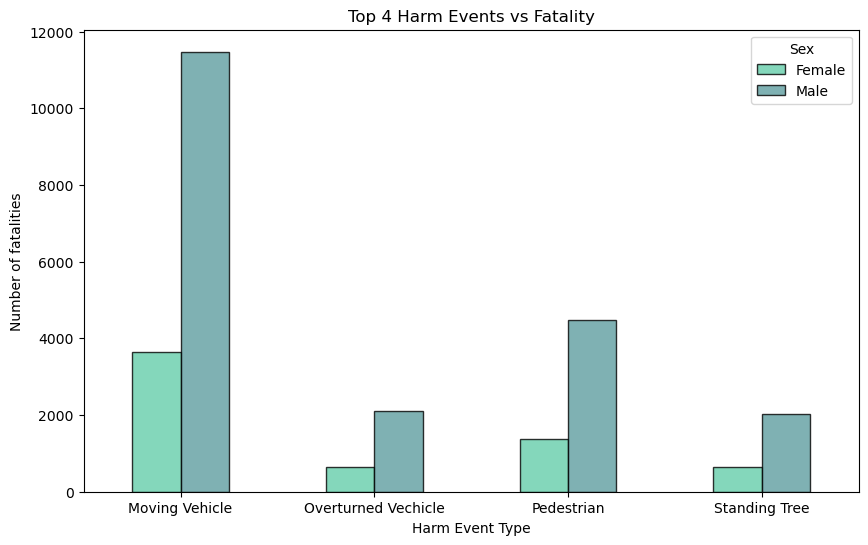

In [16]:
# Bar plot showing the top 4 harm_events identified vs fatality count. 
harm_event_df.pivot(index="Harm_Event", columns="Sex", values="Fatality_Count").plot(kind = "bar", 
                                                                                     rot = 0, figsize=(10,6), 
                                                                                     color =('mediumaquamarine', 'cadetblue'), 
                                                                                     title = "Top 4 Harm Events vs Fatality",
                                                                                     xlabel = "Harm Event Type", 
                                                                                     ylabel = "Number of fatalities", 
                                                                                     edgecolor="black",
                                                                                     alpha=0.8
                                                                                    )
plt.show()

## Speed limit vs Fatality Count

Speed limit in the this study takes on the meaning of the speed limit of the road where the road incident took place. 

The accidnets which occoured of roads with different speed limits will be analysed. 

In [17]:
# Creating a separate DataFrame to visualise the the number of fatalities which occoured at each of the speed limits included in this dataset. 
speed_limit_df = Cleaned_df[["Speed_Limit", "Fatality_Count"]]
speed_limit_df.reset_index()
speed_limit_df

,Speed_Limit,Fatality_Count
0,45,3
1,35,1
2,65,1
3,35,1
4,45,1
...,...,...
36148,70,2
36149,75,1
36150,40,1
36151,70,1


In [18]:
# Calculating measures of central tendancy for the speed limits in this dataset.

mean_numpy = round(np.mean(speed_limit_df["Speed_Limit"]),2)
print(f"\n The mean speed limit of road accidents occoured on roads with a speed limit of {mean_numpy} MPH")

median_numpy = round(np.median(speed_limit_df["Speed_Limit"]),2)
print(f"\n The median speed limit of road accidents occoured on roads with a speed limit of {median_numpy} MPH")

import scipy.stats as st

mode_scipy = st.mode(speed_limit_df["Speed_Limit"], keepdims=False)
print(f"\n The mode speed limit of road accidents occoured on roads with a speed limit of {mode_scipy} MPH")


 The mean speed limit of road accidents occoured on roads with a speed limit of 50.23 MPH

 The median speed limit of road accidents occoured on roads with a speed limit of 50.0 MPH

 The mode speed limit of road accidents occoured on roads with a speed limit of ModeResult(mode=55, count=8491) MPH


NormaltestResult(statistic=0.6296035560759606, pvalue=0.7299335487899345)
NormaltestResult(statistic=12.351051459658965, pvalue=0.0020797122632178772)


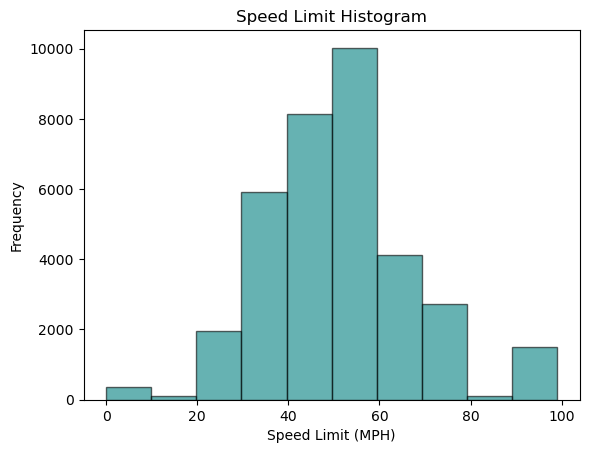

In [19]:
# Characterises the data set using a histogram and a normal test.
plt.hist(speed_limit_df["Speed_Limit"], color="teal", edgecolor="black", alpha = 0.6)

plt.title("Speed Limit Histogram")
plt.xlabel("Speed Limit (MPH)")
plt.ylabel("Frequency")


# Determines if the speed limits that road incidents were recorded for are normally distributed using a small and large sample size. 
print(st.normaltest(speed_limit_df["Speed_Limit"].sample(20)))
print(st.normaltest(speed_limit_df["Speed_Limit"].sample(100)))

plt.show()


 The r-value is: 0.00301


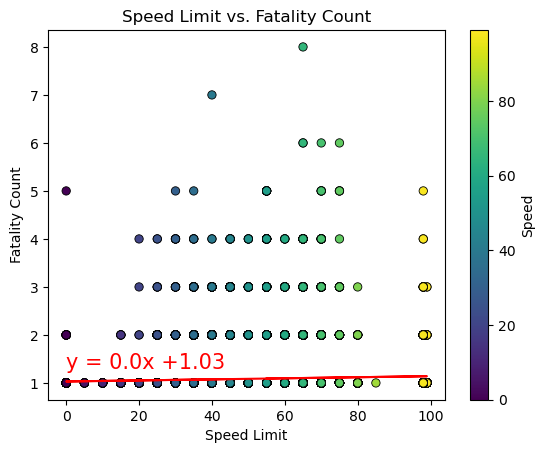

In [20]:
# Scatter plot.
x_values = speed_limit_df["Speed_Limit"]
y_values = speed_limit_df["Fatality_Count"]
plt.scatter(x_values ,y_values, marker="o", c=speed_limit_df["Speed_Limit"], edgecolor="black", linewidth=0.6)
clb = plt.colorbar()
clb.set_label("Speed")

# Headings. 
plt.title("Speed Limit vs. Fatality Count")
plt.xlabel("Speed Limit")
plt.ylabel("Fatality Count")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,1.3), fontsize=15, color="red")

print(f" The r-value is: {round(rvalue**2, 5)}")
plt.show()

In [21]:
speed_limit_df = Cleaned_df[["Speed_Limit", "Fatality_Count"]]
speed_limit_df.reset_index()

speed_limit_df = speed_limit_df.groupby(["Speed_Limit"]).sum()

speed_limit_df.reset_index(inplace=True)

speed_limit_df

,Speed_Limit,Fatality_Count
0,0,361
1,5,11
2,10,26
3,15,76
4,20,124
5,25,1942
6,30,1974
7,35,4270
8,40,2912
9,45,5803


In [22]:
bins = [0, 25, 50, 75, 100]

group_names = ["0-25 MPH", "26-50 MPH", "51-75 MPH", "76-100 MPH"]

speed_limit_df["Speed_Limit_Group"] = pd.cut(speed_limit_df["Speed_Limit"], bins, labels=group_names)

speed_limit_df = speed_limit_df.groupby(["Speed_Limit_Group"]).sum()

speed_limit_df = speed_limit_df[["Fatality_Count"]]
speed_limit_df = pd.DataFrame(speed_limit_df)
speed_limit_df

,Fatality_Count
Speed_Limit_Group,
0-25 MPH,2179
26-50 MPH,16621
51-75 MPH,17080
76-100 MPH,1714


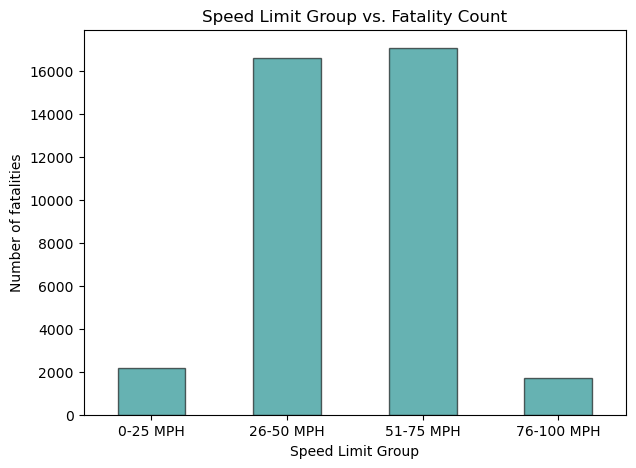

In [23]:
speed_limit_df.plot(kind="bar", rot = 0, figsize=(7,5), legend=False, 
                   title = "Speed Limit Group vs. Fatality Count",
                   xlabel = "Speed Limit Group", 
                   ylabel = "Number of fatalities", 
                   edgecolor ="black", 
                   color= "teal", 
                   alpha=0.6)
plt.show()